# Vectors as States

**Companion notebook for:** [`vectors-as-states.md`](./vectors-as-states.md)

This notebook demonstrates the key ideas from the lesson:
- Quantum states are vectors
- Normalization is a constraint
- Measurement is projection
- Amplitudes ≠ probabilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
np.set_printoptions(precision=3, suppress=True)

## 1. Quantum States are Vectors

A qubit state |ψ⟩ = a|0⟩ + b|1⟩ is just a vector [a, b].

State vector: [0.707+0.j 0.707+0.j]

This represents: 0.707|0⟩ + 0.707|1⟩


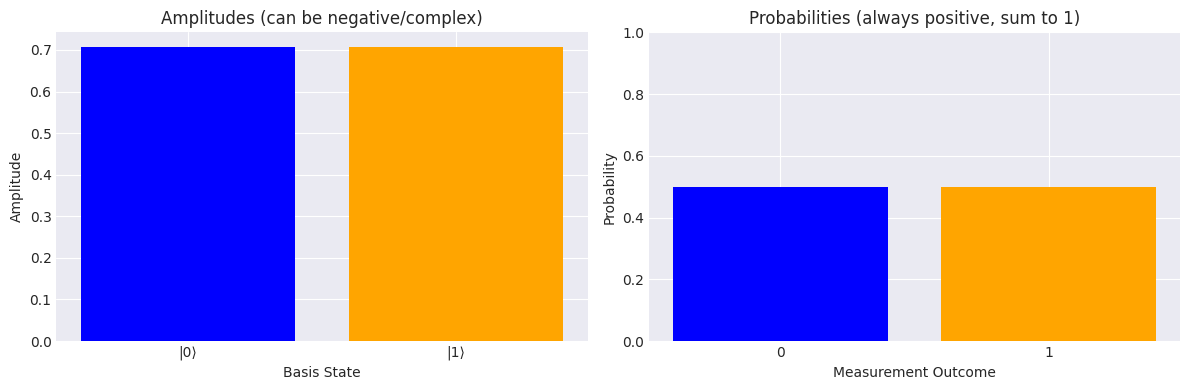

In [2]:
# Create a simple quantum state
a = 1/np.sqrt(2)
b = 1/np.sqrt(2)

state = Statevector([a, b])
print(f"State vector: {state.data}")
print(f"\nThis represents: {a:.3f}|0⟩ + {b:.3f}|1⟩")

# Visualize as a bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Amplitudes
ax1.bar([0, 1], [a, b], color=['blue', 'orange'])
ax1.set_xlabel('Basis State')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitudes (can be negative/complex)')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['|0⟩', '|1⟩'])
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Probabilities
probs = state.probabilities()
ax2.bar([0, 1], probs, color=['blue', 'orange'])
ax2.set_xlabel('Measurement Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Probabilities (always positive, sum to 1)')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['0', '1'])
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

## 2. Normalization Constraint

The lesson says: "Quantum states must have length 1."

Let's see what this means and why it matters.

In [3]:
# Valid state: |a|² + |b|² = 1
a_valid = 0.6
b_valid = 0.8
print(f"Valid state: a={a_valid}, b={b_valid}")
print(f"|a|² + |b|² = {a_valid**2 + b_valid**2:.3f}")
print(f"This works! ✓\n")

# Invalid state: doesn't sum to 1
a_invalid = 0.5
b_invalid = 0.5
print(f"Invalid state: a={a_invalid}, b={b_invalid}")
print(f"|a|² + |b|² = {a_invalid**2 + b_invalid**2:.3f}")
print(f"This is not a valid quantum state! ✗")
print(f"\nWhy? Probabilities would sum to {a_invalid**2 + b_invalid**2:.3f}, not 1.0")

Valid state: a=0.6, b=0.8
|a|² + |b|² = 1.000
This works! ✓

Invalid state: a=0.5, b=0.5
|a|² + |b|² = 0.500
This is not a valid quantum state! ✗

Why? Probabilities would sum to 0.500, not 1.0


## 3. Measurement is Projection

The lesson says: "Measurement projects the vector onto the measurement axis."

Let's visualize this geometrically.

State: 0.866|0⟩ + 0.500|1⟩

Measurement probabilities:
  P(0) = |a|² = 0.750
  P(1) = |b|² = 0.250


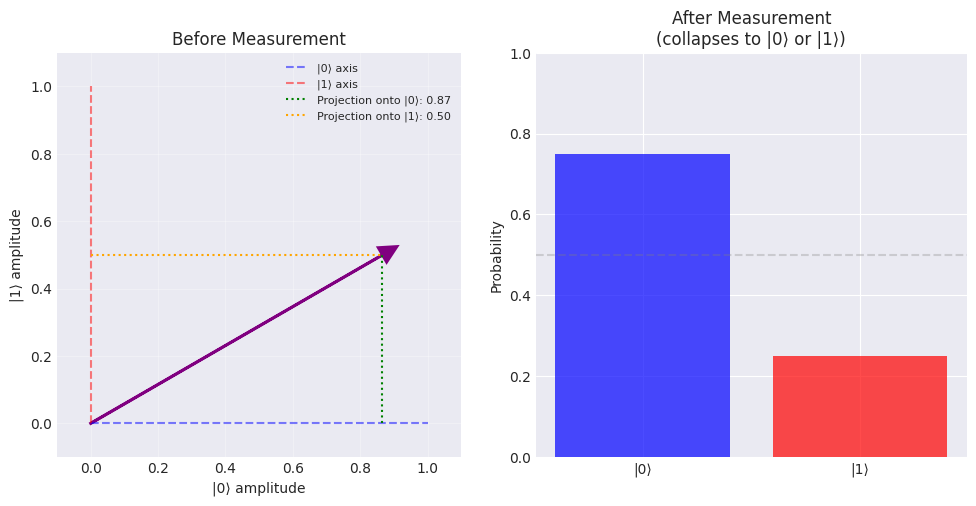


Key insight: The state vector's length onto each axis
determines the probability of measuring that outcome.


In [4]:
# Create a state that's not aligned with |0⟩ or |1⟩
theta = np.pi / 3  # 60 degrees
a = np.cos(theta / 2)
b = np.sin(theta / 2)

state = Statevector([a, b])
print(f"State: {a:.3f}|0⟩ + {b:.3f}|1⟩")
print(f"\nMeasurement probabilities:")
print(f"  P(0) = |a|² = {a**2:.3f}")
print(f"  P(1) = |b|² = {b**2:.3f}")

# Visualize the projection
fig = plt.figure(figsize=(10, 5))

# Before measurement: state vector in 2D
ax1 = fig.add_subplot(121)
ax1.arrow(0, 0, a, b, head_width=0.05, head_length=0.05, fc='purple', ec='purple', linewidth=2)
ax1.plot([0, 1], [0, 0], 'b--', alpha=0.5, label='|0⟩ axis')
ax1.plot([0, 0], [0, 1], 'r--', alpha=0.5, label='|1⟩ axis')

# Show projections
ax1.plot([a, a], [0, b], 'g:', linewidth=1.5, label=f'Projection onto |0⟩: {a:.2f}')
ax1.plot([0, a], [b, b], 'orange', linestyle=':', linewidth=1.5, label=f'Projection onto |1⟩: {b:.2f}')

ax1.set_xlim([-0.1, 1.1])
ax1.set_ylim([-0.1, 1.1])
ax1.set_aspect('equal')
ax1.set_xlabel('|0⟩ amplitude')
ax1.set_ylabel('|1⟩ amplitude')
ax1.set_title('Before Measurement')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# After measurement: collapsed to |0⟩ or |1⟩
ax2 = fig.add_subplot(122)
outcomes = ['|0⟩', '|1⟩']
probs = [a**2, b**2]
colors = ['blue', 'red']
ax2.bar(outcomes, probs, color=colors, alpha=0.7)
ax2.set_ylabel('Probability')
ax2.set_title('After Measurement\n(collapses to |0⟩ or |1⟩)')
ax2.set_ylim([0, 1])
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey insight: The state vector's length onto each axis")
print(f"determines the probability of measuring that outcome.")

## 4. Amplitudes Can Be Negative

Unlike probabilities, amplitudes can have any sign.

In [5]:
# Compare two states with different relative signs
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])   # |+⟩
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])  # |−⟩

print("State |+⟩:", state_plus.data)
print("State |−⟩:", state_minus.data)
print("\nMeasurement probabilities:")
print(f"|+⟩: {state_plus.probabilities()}")
print(f"|−⟩: {state_minus.probabilities()}")
print("\n→ Same probabilities, but DIFFERENT states!")
print("→ The difference is in the phase/sign.")
print("→ This will matter when we apply gates.")

State |+⟩: [0.707+0.j 0.707+0.j]
State |−⟩: [ 0.707+0.j -0.707+0.j]

Measurement probabilities:
|+⟩: [0.5 0.5]
|−⟩: [0.5 0.5]

→ Same probabilities, but DIFFERENT states!
→ The difference is in the phase/sign.
→ This will matter when we apply gates.


## Summary

From this notebook, you should understand:

1. **States are vectors** — not probability distributions
2. **Normalization is essential** — |a|² + |b|² must equal 1
3. **Measurement projects** — the state collapses to a basis state
4. **Amplitudes ≠ probabilities** — amplitudes can be negative or complex

**Next:** [Complex Numbers (Not Scary)](./complex-numbers-not-scary.ipynb)  
Where we'll see why complex amplitudes enable interference.